In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df=pd.read_csv("Bengaluru_House_Data.csv")
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


# explore data

In [3]:
df.shape

(13320, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [5]:
df.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [6]:
df.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [7]:
df.nunique()

area_type          4
availability      81
location        1305
size              31
society         2688
total_sqft      2117
bath              19
balcony            4
price           1994
dtype: int64

In [8]:
df.area_type.value_counts()

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

In [9]:
df.location.value_counts()

Whitefield                      540
Sarjapur  Road                  399
Electronic City                 302
Kanakpura Road                  273
Thanisandra                     234
                               ... 
Sundar Ram Shetty Nagar           1
Near Electronic City,             1
Gaundanapalya                     1
Shirdi Sai Nagar                  1
Binny Mills Employees Colony      1
Name: location, Length: 1305, dtype: int64

In [10]:
df.availability.value_counts()

Ready To Move    10581
18-Dec             307
18-May             295
18-Apr             271
18-Aug             200
                 ...  
14-Nov               1
16-Nov               1
15-Jun               1
15-Aug               1
14-Jul               1
Name: availability, Length: 81, dtype: int64

In [11]:
df.society.value_counts()

GrrvaGr    80
PrarePa    76
Prtates    59
Sryalan    59
GMown E    56
           ..
Krine C     1
Vangsld     1
Vaarai      1
Keleti      1
GCngsn      1
Name: society, Length: 2688, dtype: int64

In [12]:
df.balcony.value_counts()

2.0    5113
1.0    4897
3.0    1672
0.0    1029
Name: balcony, dtype: int64

In [13]:
df.total_sqft.value_counts()

1200           843
1100           221
1500           205
2400           196
600            180
              ... 
5384             1
1114             1
1310 - 1615      1
2570             1
4356             1
Name: total_sqft, Length: 2117, dtype: int64

In [14]:
df.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

# Data Cleaning: handle null values

In [15]:
df.columns[df.isnull().any()]

Index(['location', 'size', 'society', 'bath', 'balcony'], dtype='object')

In [16]:
df.isna().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [17]:
df2=df.drop("society" , axis=1)


In [18]:
df2.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [19]:
df2.isnull().sum()

area_type         0
availability      0
location          1
size             16
total_sqft        0
bath             73
balcony         609
price             0
dtype: int64

In [20]:
df2.balcony = df2.balcony.fillna(df2.balcony.mode()[0])
df2.isna().sum()

area_type        0
availability     0
location         1
size            16
total_sqft       0
bath            73
balcony          0
price            0
dtype: int64

In [21]:
df2.dropna(inplace=True)
df2.isnull().sum()

area_type       0
availability    0
location        0
size            0
total_sqft      0
bath            0
balcony         0
price           0
dtype: int64

In [22]:
display(df.shape)
display(df2.shape)

(13320, 9)

(13246, 8)

# Feature Engineering

In [23]:
df3=df2.copy()

In [24]:
df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))

In [25]:
df3.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,bhk
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,2
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,4
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,3
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,3
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00,2


In [26]:
df3.drop("size"  , axis=1 , inplace=True)


In [27]:
df3.head()

,area_type,availability,location,total_sqft,bath,balcony,price,bhk
0,Super built-up Area,19-Dec,Electronic City Phase II,1056,2.0,1.0,39.07,2
1,Plot Area,Ready To Move,Chikka Tirupathi,2600,5.0,3.0,120.00,4
2,Built-up Area,Ready To Move,Uttarahalli,1440,2.0,3.0,62.00,3
3,Super built-up Area,Ready To Move,Lingadheeranahalli,1521,3.0,1.0,95.00,3
4,Super built-up Area,Ready To Move,Kothanur,1200,2.0,1.0,51.00,2


In [28]:
df3.total_sqft.dtype

dtype('O')

In [29]:
def isfloat(x):
    try:
        float(x)
    except:
        return False 
    return True 

In [30]:
df3[~df3["total_sqft"].apply(isfloat)].head(10)

,area_type,availability,location,total_sqft,bath,balcony,price,bhk
30,Super built-up Area,19-Dec,Yelahanka,2100 - 2850,4.0,0.0,186.000,4
122,Super built-up Area,18-Mar,Hebbal,3067 - 8156,4.0,0.0,477.000,4
137,Super built-up Area,19-Mar,8th Phase JP Nagar,1042 - 1105,2.0,0.0,54.005,2
165,Super built-up Area,18-Dec,Sarjapur,1145 - 1340,2.0,0.0,43.490,2
188,Super built-up Area,Ready To Move,KR Puram,1015 - 1540,2.0,0.0,56.800,2
410,Super built-up Area,Ready To Move,Kengeri,34.46Sq. Meter,1.0,0.0,18.500,1
549,Super built-up Area,18-Sep,Hennur Road,1195 - 1440,2.0,0.0,63.770,2
648,Built-up Area,Ready To Move,Arekere,4125Perch,9.0,2.0,265.000,9
661,Super built-up Area,Ready To Move,Yelahanka,1120 - 1145,2.0,0.0,48.130,2
672,Built-up Area,18-Mar,Bettahalsoor,3090 - 5002,4.0,0.0,445.000,4


In [31]:
def convert_total_sqft_to_num(x):
  tokens = x.split('-') 
  if len(tokens) == 2:
    return(float(tokens[0]) + (float(tokens[1])))/2 
  try:
    return float(x)
  except:
    return None

In [32]:
df4 = df3.copy()
df4.total_sqft = df4.total_sqft.apply(convert_total_sqft_to_num)


In [33]:
df4 = df4[df4.total_sqft.notnull()]

In [34]:
df4.isnull().sum()

area_type       0
availability    0
location        0
total_sqft      0
bath            0
balcony         0
price           0
bhk             0
dtype: int64

In [35]:
df4.total_sqft.dtypes

dtype('float64')

In [36]:
df4.head()

,area_type,availability,location,total_sqft,bath,balcony,price,bhk
0,Super built-up Area,19-Dec,Electronic City Phase II,1056.0,2.0,1.0,39.07,2
1,Plot Area,Ready To Move,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4
2,Built-up Area,Ready To Move,Uttarahalli,1440.0,2.0,3.0,62.00,3
3,Super built-up Area,Ready To Move,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3
4,Super built-up Area,Ready To Move,Kothanur,1200.0,2.0,1.0,51.00,2


# Add new feature (price per sqft)

In [37]:
df5=df4.copy()
df5["price_per_sqft"]=df5["price"]/ df5["total_sqft"]
df5.head()

,area_type,availability,location,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Super built-up Area,19-Dec,Electronic City Phase II,1056.0,2.0,1.0,39.07,2,0.036998
1,Plot Area,Ready To Move,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4,0.046154
2,Built-up Area,Ready To Move,Uttarahalli,1440.0,2.0,3.0,62.00,3,0.043056
3,Super built-up Area,Ready To Move,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3,0.062459
4,Super built-up Area,Ready To Move,Kothanur,1200.0,2.0,1.0,51.00,2,0.042500


In [38]:
df5["price_per_sqft"]=df5["price_per_sqft"] * 100000

In [39]:
df5.head()

,area_type,availability,location,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Super built-up Area,19-Dec,Electronic City Phase II,1056.0,2.0,1.0,39.07,2,3699.810606
1,Plot Area,Ready To Move,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4,4615.384615
2,Built-up Area,Ready To Move,Uttarahalli,1440.0,2.0,3.0,62.00,3,4305.555556
3,Super built-up Area,Ready To Move,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3,6245.890861
4,Super built-up Area,Ready To Move,Kothanur,1200.0,2.0,1.0,51.00,2,4250.000000


In [40]:
df5.location = df5.location.apply(lambda x: x.strip())
location_stats =df5.location.value_counts().sort_values(ascending=False)

In [41]:
len(location_stats[location_stats <= 10])

1047

In [42]:
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

1st Block Koramangala       10
Dairy Circle                10
Sadashiva Nagar             10
Thyagaraja Nagar            10
Dodsworth Layout            10
                            ..
Junnasandra                  1
Tharabanahalli               1
Banashankari stage 2         1
Electronic City Phase 1,     1
Kuvempu Layout               1
Name: location, Length: 1047, dtype: int64

In [43]:
def other(x):
    if x in location_stats_less_than_10 :
        return "other"
    else:
        return x

In [44]:
df5["location"]=df5.location.apply(other)

In [45]:
len(df5.location.unique())

241

# Outlier Removal by Business Logic 
 ### conversation with  business manager (who has expertise in real estate) he will tell me  that normally square ft per bedroom is 300 (i.e. 2 bhk apartment is minimum 600 sqft

 # I will going to filter the outlier that less than 300

In [46]:
df5[(df5.total_sqft/ df5.bhk < 300)]

,area_type,availability,location,total_sqft,bath,balcony,price,bhk,price_per_sqft
9,Plot Area,Ready To Move,other,1020.0,6.0,2.0,370.0,6,36274.509804
45,Plot Area,Ready To Move,HSR Layout,600.0,9.0,2.0,200.0,8,33333.333333
58,Plot Area,Ready To Move,Murugeshpalya,1407.0,4.0,1.0,150.0,6,10660.980810
68,Plot Area,Ready To Move,Devarachikkanahalli,1350.0,7.0,0.0,85.0,8,6296.296296
70,Plot Area,Ready To Move,other,500.0,3.0,2.0,100.0,3,20000.000000
...,...,...,...,...,...,...,...,...,...
13277,Plot Area,Ready To Move,other,1400.0,7.0,2.0,218.0,7,15571.428571
13279,Plot Area,Ready To Move,other,1200.0,5.0,2.0,130.0,6,10833.333333
13281,Plot Area,Ready To Move,Margondanahalli,1375.0,5.0,1.0,125.0,5,9090.909091
13303,Plot Area,Ready To Move,Vidyaranyapura,774.0,5.0,3.0,70.0,5,9043.927649


In [47]:
df5.shape

(13200, 9)

In [48]:
df6=df5[~ (df5.total_sqft / df5.bhk < 300)]
df6.shape

(12456, 9)

 # Outlier Removal Using Standard Deviation and Mean

In [49]:
def remove_outlier(df):
    df_out=pd.DataFrame()
    for key ,sdf in df.groupby("location"):
        m=np.mean([sdf.price_per_sqft])
        s=np.std([sdf.price_per_sqft])
        filter_df=sdf[(sdf.price_per_sqft >(m-s)) & (sdf.price_per_sqft <(m+s))]
        df_out=pd.concat([df_out , filter_df], ignore_index=True)
    return df_out

In [50]:
df7=remove_outlier(df6)
df7.shape

(10242, 9)

In [51]:
def plot_scatter_chart(df,location):
    bhk2=df[(df.location==location) & (df.bhk == 2)]
    bhk3=df[(df.location == location ) & (df.bhk == 3)]
    plt.figure(figsize=[15 ,10])
    plt.scatter(bhk2.total_sqft , bhk2.price ,label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft , bhk3.price ,label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()


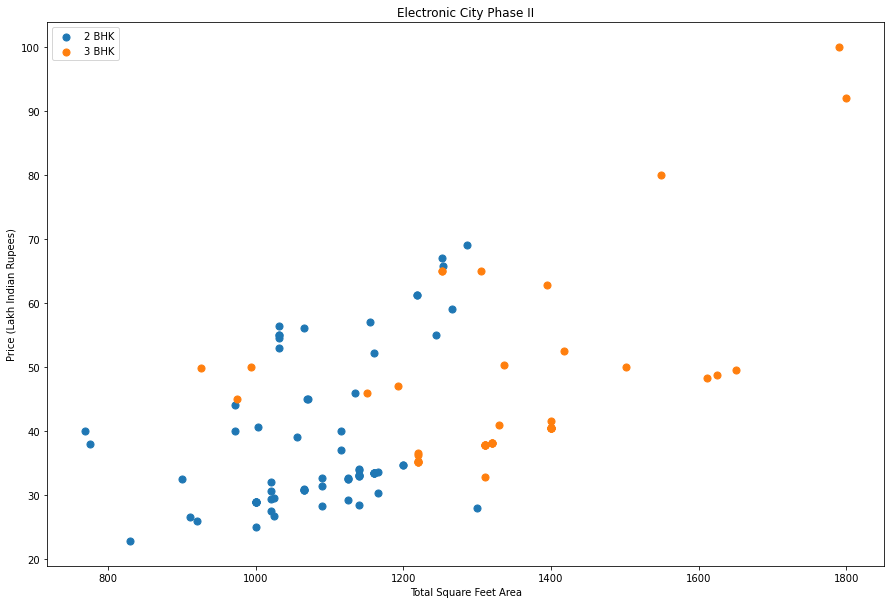

In [52]:
plot_scatter_chart(df7,"Electronic City Phase II" )

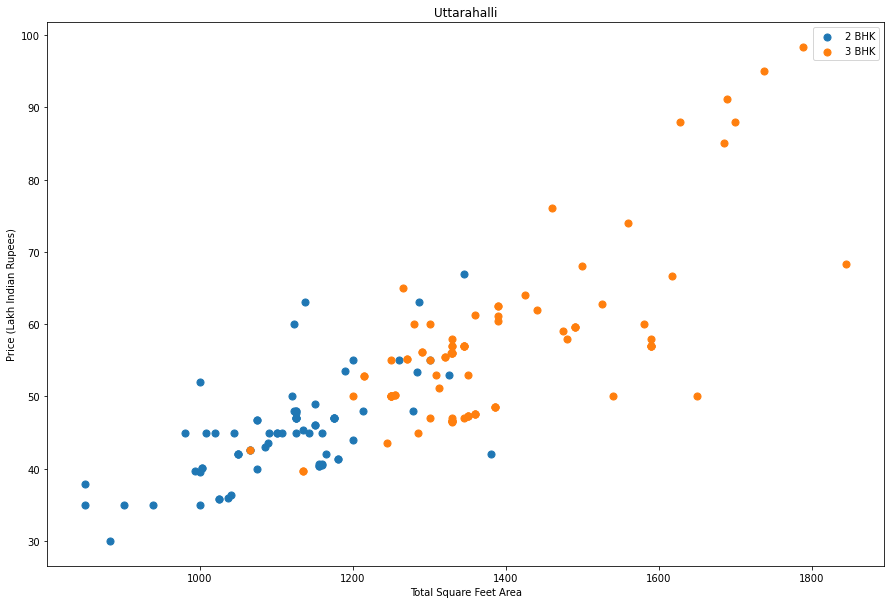

In [53]:
plot_scatter_chart(df7 , "Uttarahalli")

In [54]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df8 = remove_bhk_outliers(df7)
df8.shape

(7317, 9)

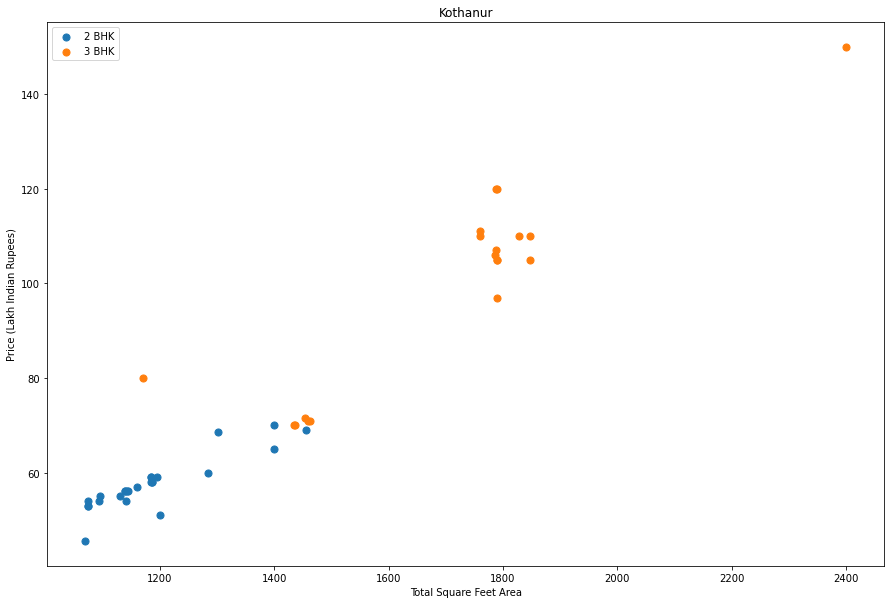

In [55]:
plot_scatter_chart(df8,"Kothanur")

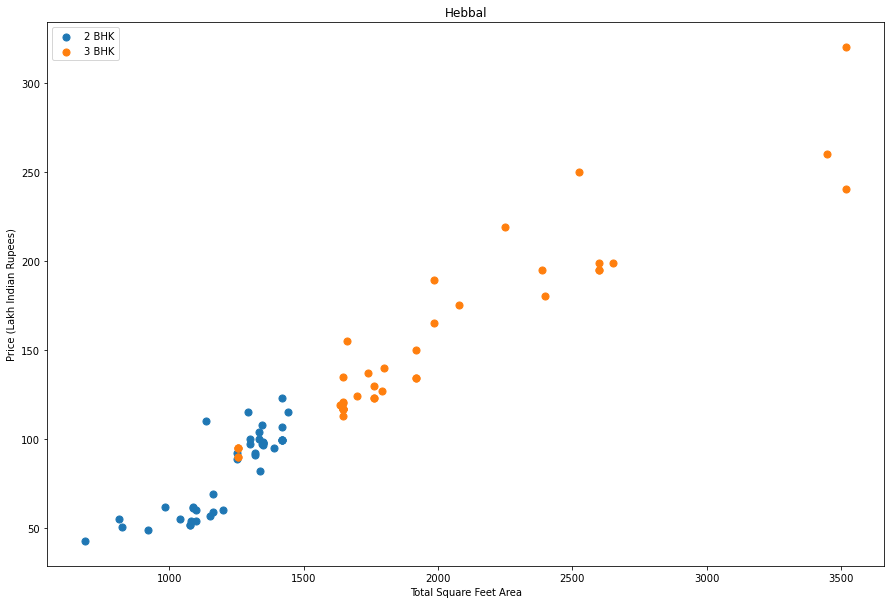

In [56]:
plot_scatter_chart(df8,"Hebbal")

Text(0, 0.5, 'Count')

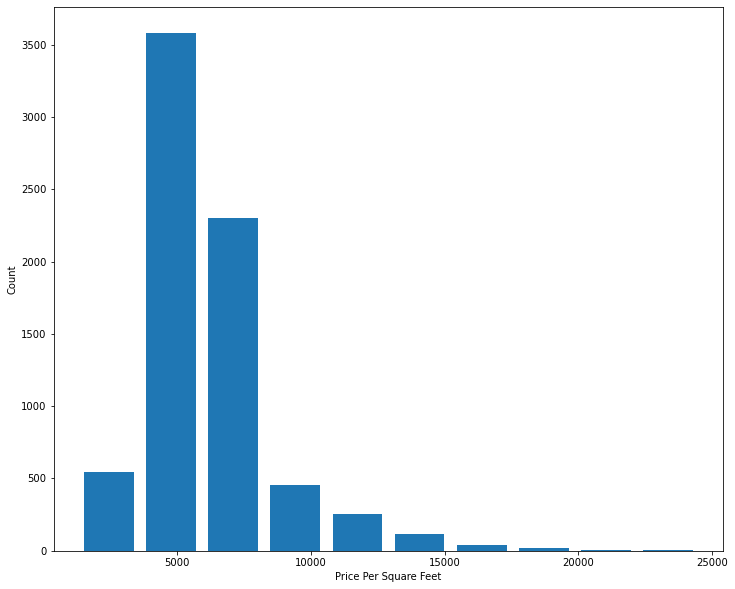

In [57]:
plt.figure(figsize=[12,10])
plt.hist(df8.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

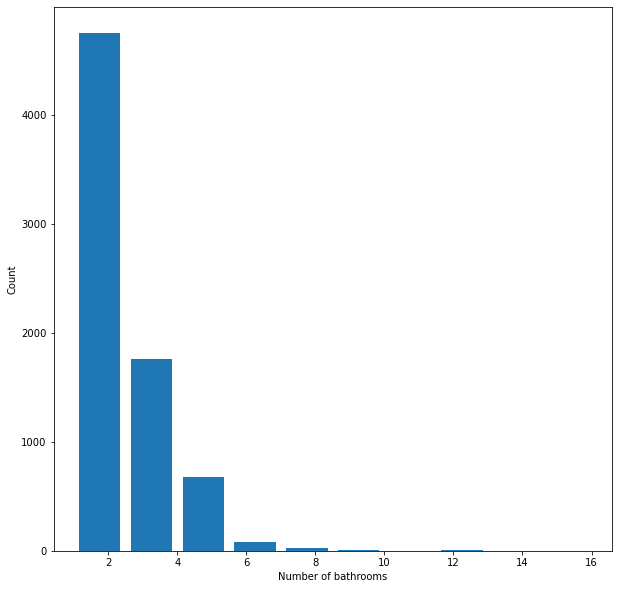

In [58]:
plt.figure(figsize=[10,10] )
plt.hist(df8.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")
plt.show()

# remove the outlier of bath 

In [59]:
df9=df8[df8.bath< df8.bhk + 1]
df9.shape

(6859, 9)

In [60]:
df9.head()

,area_type,availability,location,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Super built-up Area,20-May,1st Block Jayanagar,2850.0,4.0,1.0,428.0,4,15017.543860
1,Super built-up Area,18-Jun,1st Block Jayanagar,1630.0,3.0,2.0,194.0,3,11901.840491
2,Super built-up Area,Ready To Move,1st Block Jayanagar,1875.0,2.0,3.0,235.0,3,12533.333333
3,Built-up Area,15-Dec,1st Block Jayanagar,1200.0,2.0,0.0,130.0,3,10833.333333
4,Super built-up Area,18-Jun,1st Block Jayanagar,1235.0,2.0,2.0,148.0,2,11983.805668


 # drop unneeded feature to built the model

In [61]:
df10=df9.drop(["availability", "price_per_sqft"   , "area_type" , "balcony"], axis=1)

In [62]:
df10

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2
...,...,...,...,...,...
10231,other,1155.0,2.0,64.0,2
10233,other,1200.0,2.0,70.0,2
10234,other,1800.0,1.0,200.0,1
10237,other,1353.0,2.0,110.0,2


# Use One Hot Encoding For Location

In [63]:
dummies = pd.get_dummies(df10.location)
dummies.head(5)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [64]:
df11=df10.copy()

In [65]:
df11=pd.concat([df11 , dummies] , axis=1)

In [66]:
df11.drop(["other" , "location" ] ,axis=1 ,inplace= True)

In [67]:
df11

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,130.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,148.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10231,1155.0,2.0,64.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10233,1200.0,2.0,70.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10234,1800.0,1.0,200.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10237,1353.0,2.0,110.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


 # Build a Model

In [68]:
df11.shape

(6859, 244)

In [69]:
X = df11.drop(['price'],axis='columns')
X.head(3)

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [70]:
y = df11.price

In [71]:
X.shape

(6859, 243)

In [72]:
y.shape

(6859,)

In [73]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=110)

In [74]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.8718889606158169

In [75]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.25, random_state=110)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.87188896, 0.84335141, 0.81482468, 0.8396724 , 0.82007737])

 # Test the model for few properties

In [76]:
def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return model.predict([x])[0]

In [77]:
predict_price('1st Phase JP Nagar',1000, 2, 2)

78.46267306864891

In [78]:
model.score(X_test, y_test)

0.8718889606158169

In [79]:
import pickle
with open('banglore_home_prices_model.pickle','wb') as f:
    pickle.dump(model,f)